In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Решите линейную систему:



In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

2. Найдите псевдорешение:


In [5]:
C = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
D = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(C, D, rcond=None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

3. Сколько решений имеет линейная система? Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 



In [8]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 0]])
C = np.concatenate((A, B.T), axis=1)
print(C)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  0]]


In [9]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 3)

In [15]:
B = np.array([[1, 1, 1]]) 
C = np.concatenate((A, B.T), axis=1)
print(C)

[[1 2 3 1]
 [4 5 6 1]
 [7 8 9 1]]


In [16]:
rank_A, rank_C = np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)
print(rank_A, rank_C)

2 2


#Система имеет бесконечное кол-во решений

4. Вычислите LU-разложение матрицы. После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.


In [18]:
import scipy
import scipy.linalg

In [19]:
a = np.array([[1,2,3],[2,16,21],[4,28,73]])
print(a)

[[ 1  2  3]
 [ 2 16 21]
 [ 4 28 73]]


In [20]:
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[ 7.00000000e+00  8.00000000e+00  9.00000000e+00]
 [ 0.00000000e+00  8.57142857e-01  1.71428571e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.58603289e-16]]


In [21]:
B = np.array([2, -5, 7])

In [22]:
X = np.linalg.solve(A, B)
X

array([ 5.9897875e+16, -1.1979575e+17,  5.9897875e+16])

5. Найдите нормальное псевдорешение недоопределенной системы. Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.


In [23]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

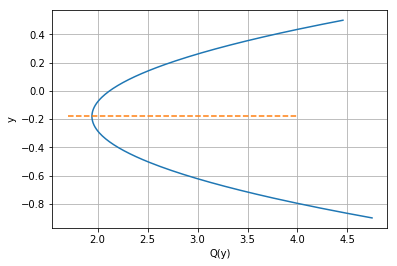

In [24]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

y = np.linspace(-0.9, 0.5, 201)
plt.plot(Q(1.4 + 0.1*y, y, 0.4 + 2.1*y),y)
plt.xlabel('Q(y)')
plt.ylabel('y')
#plt.xlabel('z')
plt.grid(True)
plt.plot([1.7, 4], [-0.18081181, -0.18081181],  linestyle = '--')
plt.show()

6. Найдите одно из псевдорешений вырожденной системы. Попробуйте также отыскать и нормальное псевдорешение.


In [25]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])
C = np.array([[1, 2, 3, 2], [4, 5, 6, 5], [7, 8, 9, 11]])

In [26]:
Q, R = np.linalg.qr(A)

print(Q)
print(R)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [27]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [28]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [30]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [31]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [32]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

In [33]:
#нормальное псевдорешение
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [34]:
X = np.array([1.25, 0.5, -0.25])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)

(1.3693063937629153, 1.224744871391589)